In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
#Set up environemnt
import sys
#Append PLATUS libraries if these are not set in your PYTHONPATH 
#sys.path.append('/home/jl12e12/PLATUS/')
#sys.path.append('/home/jl12e12/PLATUS/fortran/lib/')
import lib_hipstar as lh
import tools
import lines as l
import numpy as np
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save
tikz=True
pdf=True
import os

In [4]:
inlet_x=-0.5
outlet_x=1.1

# Load data

In [5]:
cd ~/drive2/HPT/inlet_turb_study/HPT_LS05_DOM30_TI20/convergence/

/media/drive2/HPT/inlet_turb_study/HPT_LS05_DOM30_TI20/convergence


In [6]:
cases=[]
labels=[]
convergencedir='./'
# now find all the stat-files and set the labels
dt=2.3*1.0e-05
root, dirs, files=next(os.walk(convergencedir))
for d in dirs:
#                self.filelist.append(os.getcwd()+'/'+convergencedir+'/'+d+'/STAT_cont.bin')
    cases.append(convergencedir+'/'+d+'/')
    temp=d.split('_')
    labels.append('%.2f - %.2f'%(float(temp[0])*dt,float(temp[2])*dt))
n_c=len(cases)
print cases
print labels

['.//5385101_to_5595101/', './/5145101_to_5355101/', './/4845101_to_5115101/']
['123.86 - 128.69', '118.34 - 123.17', '111.44 - 117.65']


In [7]:
cascades=[]
for i in range(n_c):
    filen=cases[i]+'/STAT_cont.bin'
    cascades.append(l.cascade_mean(inlet_x,outlet_x,filename=filen,infile='../cascade3d.in',Refplane='Outlet',chord=1.74
                                  ,HeatTransfer=True,label=labels[i].replace('_',' ')))

reading data from file previously extracted
reading data from file previously extracted
198
extract line from (i,j) 224 1  to  224 672  in block  4 672
reading data from file previously extracted
extract line from (i,j) 224 1  to  224 224  in block  3 224
reading data from file previously extracted
extract line from (i,j) 224 1  to  224 672  in block  5 672
reading data from file previously extracted
extract line from (i,j) 224 1  to  224 384  in block  7 384
reading data from file previously extracted


/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1347: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.tang!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1350: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.plus_coords!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1352: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.cf!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1354: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.dist!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:2658: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.blade.dist!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1488: FutureWarning: comparison to `None` will result in an elementwise object

len=1.57321798801
len=1.57321802527
extract line from (i,j) 1 1  to  1 672  in block  4 672
reading data from file previously extracted
extract line from (i,j) 223 1  to  223 672  in block  4 672
reading data from file previously extracted
extract line from (i,j) 222 1  to  222 672  in block  4 672
reading data from file previously extracted
extract line from (i,j) 224 1  to  224 672  in block  4 672
reading data from file previously extracted
extract line from (i,j) 1 1  to  1 224  in block  3 224
reading data from file previously extracted
extract line from (i,j) 223 1  to  223 224  in block  3 224
reading data from file previously extracted
extract line from (i,j) 222 1  to  222 224  in block  3 224
reading data from file previously extracted
extract line from (i,j) 224 1  to  224 224  in block  3 224
reading data from file previously extracted
extract line from (i,j) 1 1  to  1 672  in block  5 672
reading data from file previously extracted
extract line from (i,j) 223 1  to  223 6

# Plot cascae quantities

## Inlet profiles

<IPython.core.display.Javascript object>


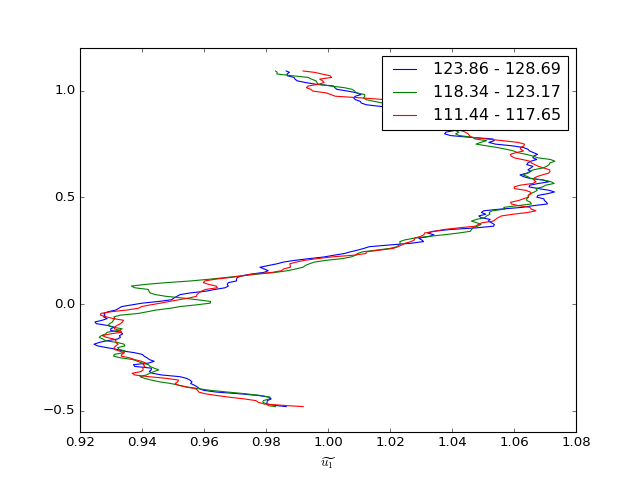

<IPython.core.display.Javascript object>


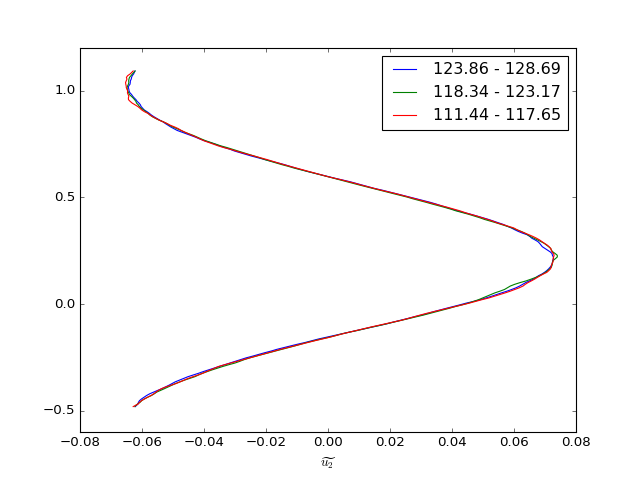

<IPython.core.display.Javascript object>


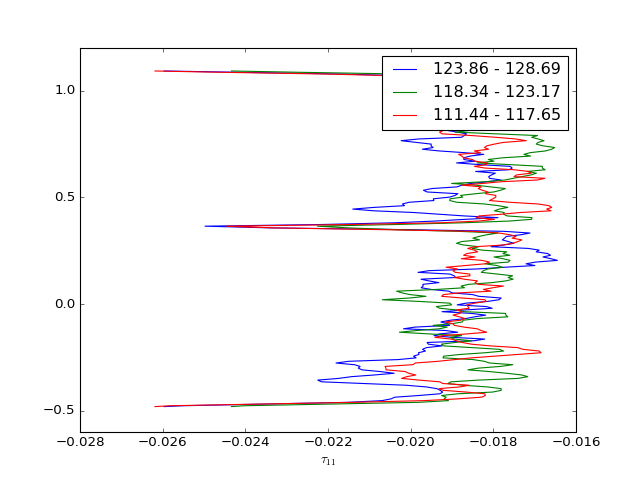

<IPython.core.display.Javascript object>


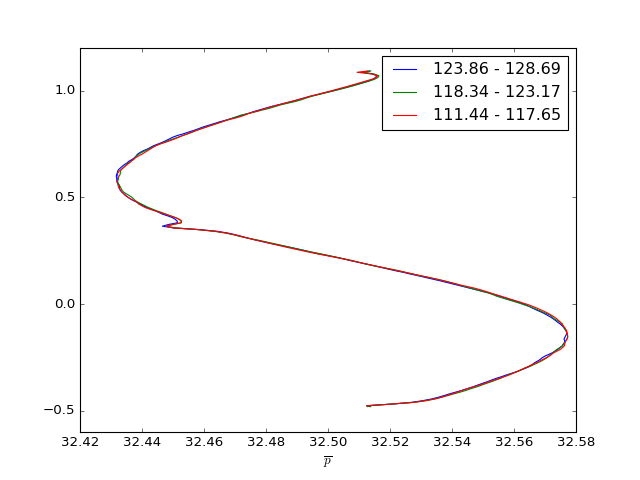

In [8]:
ids=[]
ids.append(cascades[0].header.get_index(101,2))
ids.append(cascades[0].header.get_index(101,3))
ids.append(cascades[0].header.get_index(101,10))
ids.append(cascades[0].header.get_index(101,5))
for i,val in enumerate(ids):
    plt.figure()
    for j in range(n_c):
        plt.plot(cascades[j].inlet.data[:,val],cascades[j].inlet.data[:,1],label=cascades[j].label)
    plt.legend()
    plt.xlabel(cascades[j].header.vars[val])

In [9]:
inlet_stream=l.lines(convergence=True,convergencedir='./')

In [10]:
inlet_stream.extr_line([-1.0,0.0],[-0.2,0.0],300)

reading data from file previously extracted
reading data from file previously extracted
reading data from file previously extracted


<IPython.core.display.Javascript object>


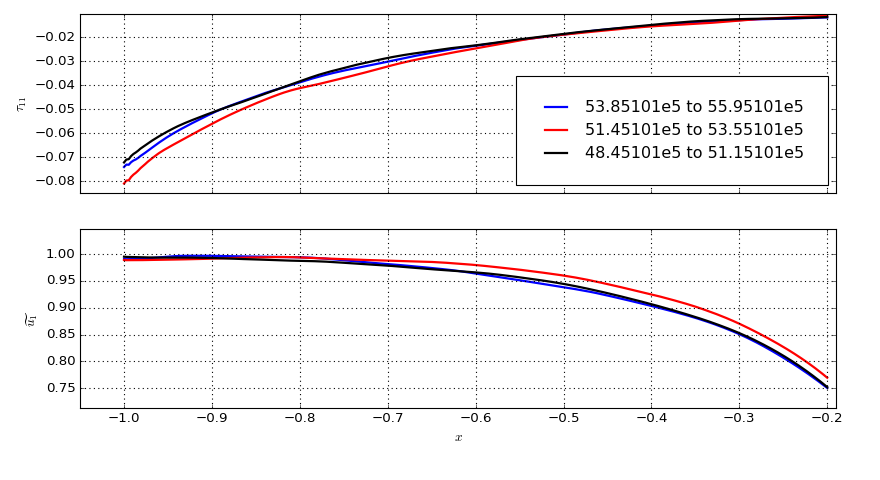

<IPython.core.display.Javascript object>


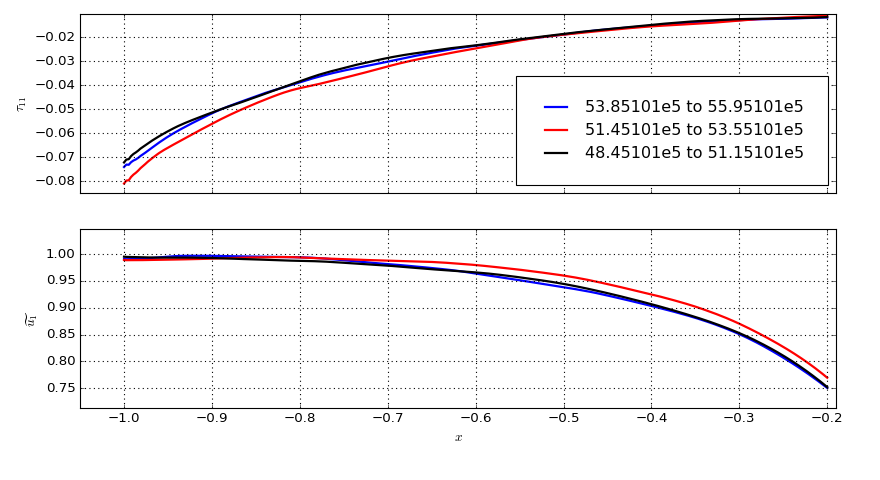

In [11]:
pl_var=[]
pl_var.append(inlet_stream.l[0].var.get_index(101,10))
pl_var.append(inlet_stream.l[0].var.get_index(101,2))
inlet_stream.plot_var([0],pl_var)

# Blade Profiles

<IPython.core.display.Javascript object>


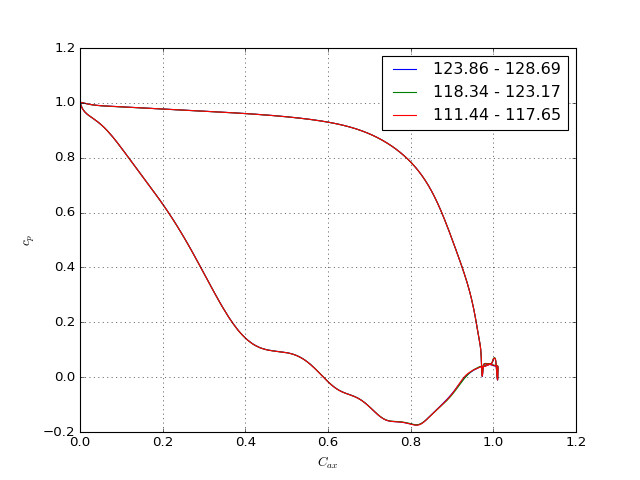

In [12]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.data[:,0],cascades[i].cp,label=cascades[i].label)
plt.grid()
plt.legend()
plt.xlabel('$C_{ax}$')
plt.ylabel('$c_p$')

<IPython.core.display.Javascript object>


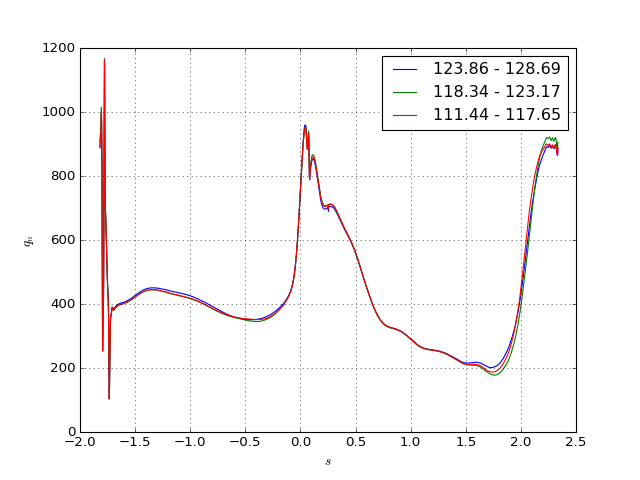

In [13]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.dist[:],cascades[i].qnorm2,label=cascades[i].label)
plt.grid()
plt.legend()
plt.xlabel('$s$')
plt.ylabel('$q_{n}$')

## Outlet region

<IPython.core.display.Javascript object>


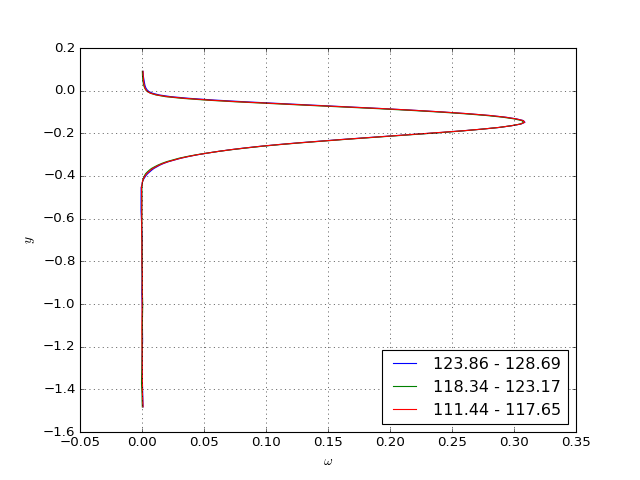

In [14]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].loss_mix[:],cascades[i].outlet.data[:,1],label=cascades[i].label)
plt.grid()
plt.legend(loc=0)
plt.xlabel('$\omega$')
plt.ylabel('$y$')